In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif, SelectKBest

In [100]:
df = pd.read_csv('data.csv')
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [101]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


# Check Missing Data

In [102]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

No missing data found

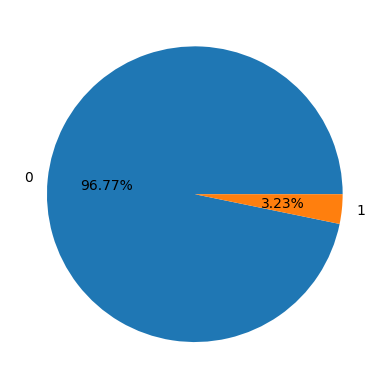

In [103]:
data = df['Bankrupt?'].value_counts()
plt.pie(data, autopct='%1.2f%%', labels=data.index)
plt.show()

6599: not end up being bankrupt
220: end up being bankrupt

In [104]:
not_bankrupt = len(df[df['Bankrupt?'] == 0])
is_bankrupt = len(df[df['Bankrupt?'] == 1])
imblance_ratio = ( is_bankrupt / (is_bankrupt+not_bankrupt) ) * 100
imblance_ratio

3.2262795131250916

imblance_ratio is 3.226
Proportion of Minority Class is within 1-20% of the data set => moderate imbalance   
Next Step: If you have an imbalanced data set, first try training on the true distribution. If the model works well and generalizes, you're done! If not, try the following downsampling and upweighting technique.

# Model prediction without rebalancing data

<AxesSubplot: >

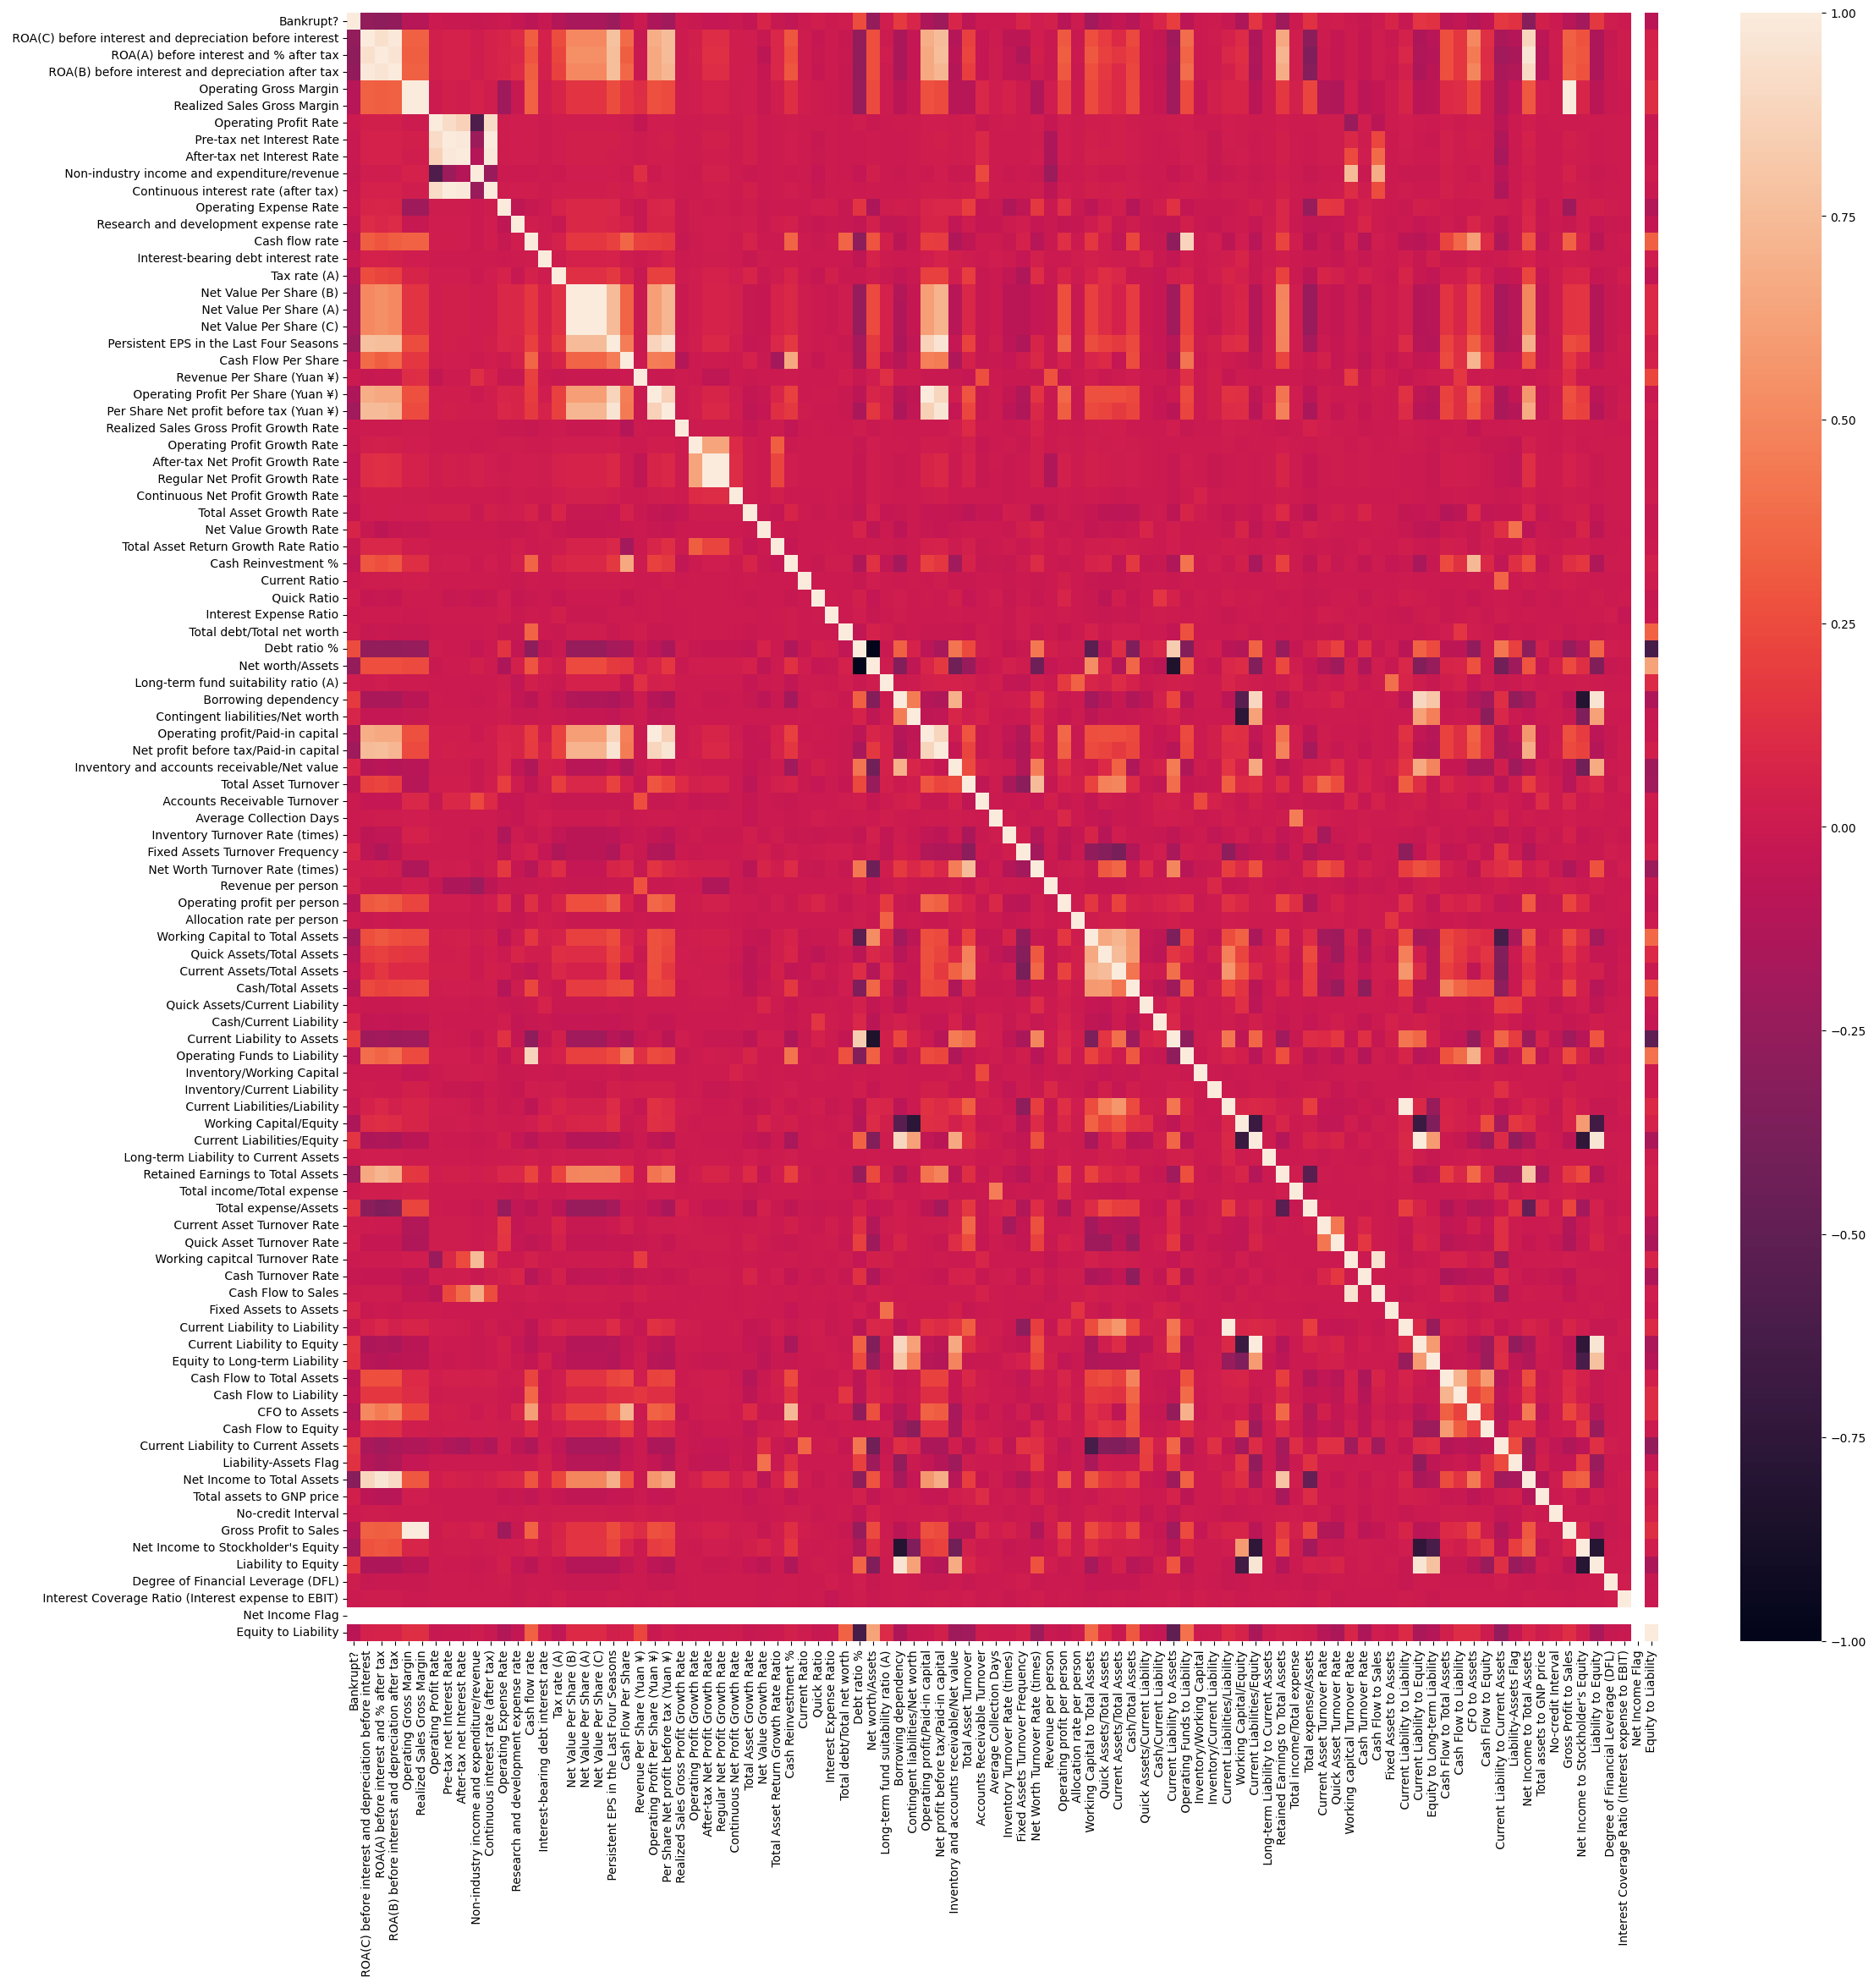

In [105]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())

There are too many feature to find out a trend or special cases here.

# Data Preprocessing

In [106]:
X = df.copy()
y = df['Bankrupt?']
X = X.drop(['Bankrupt?'], axis=1)

In [107]:
# Split Data to Train Data and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
X_train.shape, X_test.shape

((4773, 95), (2046, 95))

# First, use all features to predict in logistic regression

In [108]:
lgclassifier = LogisticRegression(random_state = 42)
lgclassifier.fit(X_train, y_train)

/Users/yang/Documents/projects/rwth/ml-group-project/venv1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Logistic Regression is failed to converge in lbfgs mode without feature selection

# Try to use KNN algorithm

In [109]:
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

In [110]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

[[1929   39]
 [  59   19]]


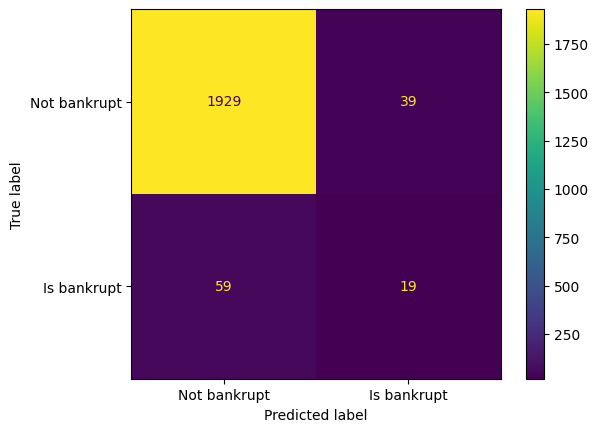

In [111]:
y_pred=knn_model.predict(scaled_X_test)
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,display_labels=["Not bankrupt", "Is bankrupt"])
disp.plot()
plt.show()

In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1968
           1       0.33      0.24      0.28        78

    accuracy                           0.95      2046
   macro avg       0.65      0.61      0.63      2046
weighted avg       0.95      0.95      0.95      2046



### for k = 1, it actually run very well with KNN classification, but we can find an optimal k

In [113]:
# run KNN with hyperparameter tuning, to find optimal value of k
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)

    y_pred_test=knn_model.predict(scaled_X_test)
    test_error = 1-accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
print("optimal K for KNN: ", test_error_rates.index(min(test_error_rates))+1)

optimal K for KNN:  17


Text(0.5, 0, 'K Neighbors')

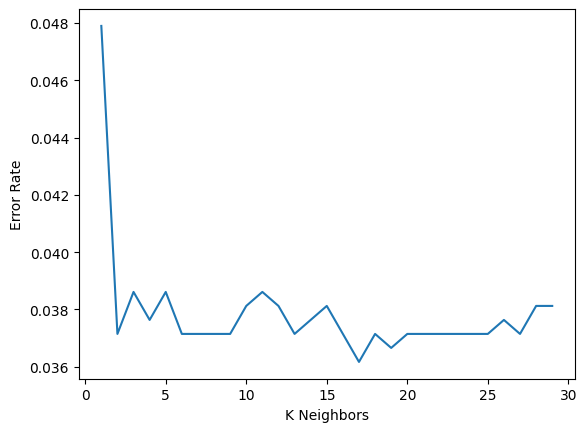

In [114]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel("Error Rate")
plt.xlabel("K Neighbors")

### We can see the optimal K neighbors is around 16

# Add Feature Selection - Analyze Mutual Infromation

Text(0, 0.5, 'Mutual Information')

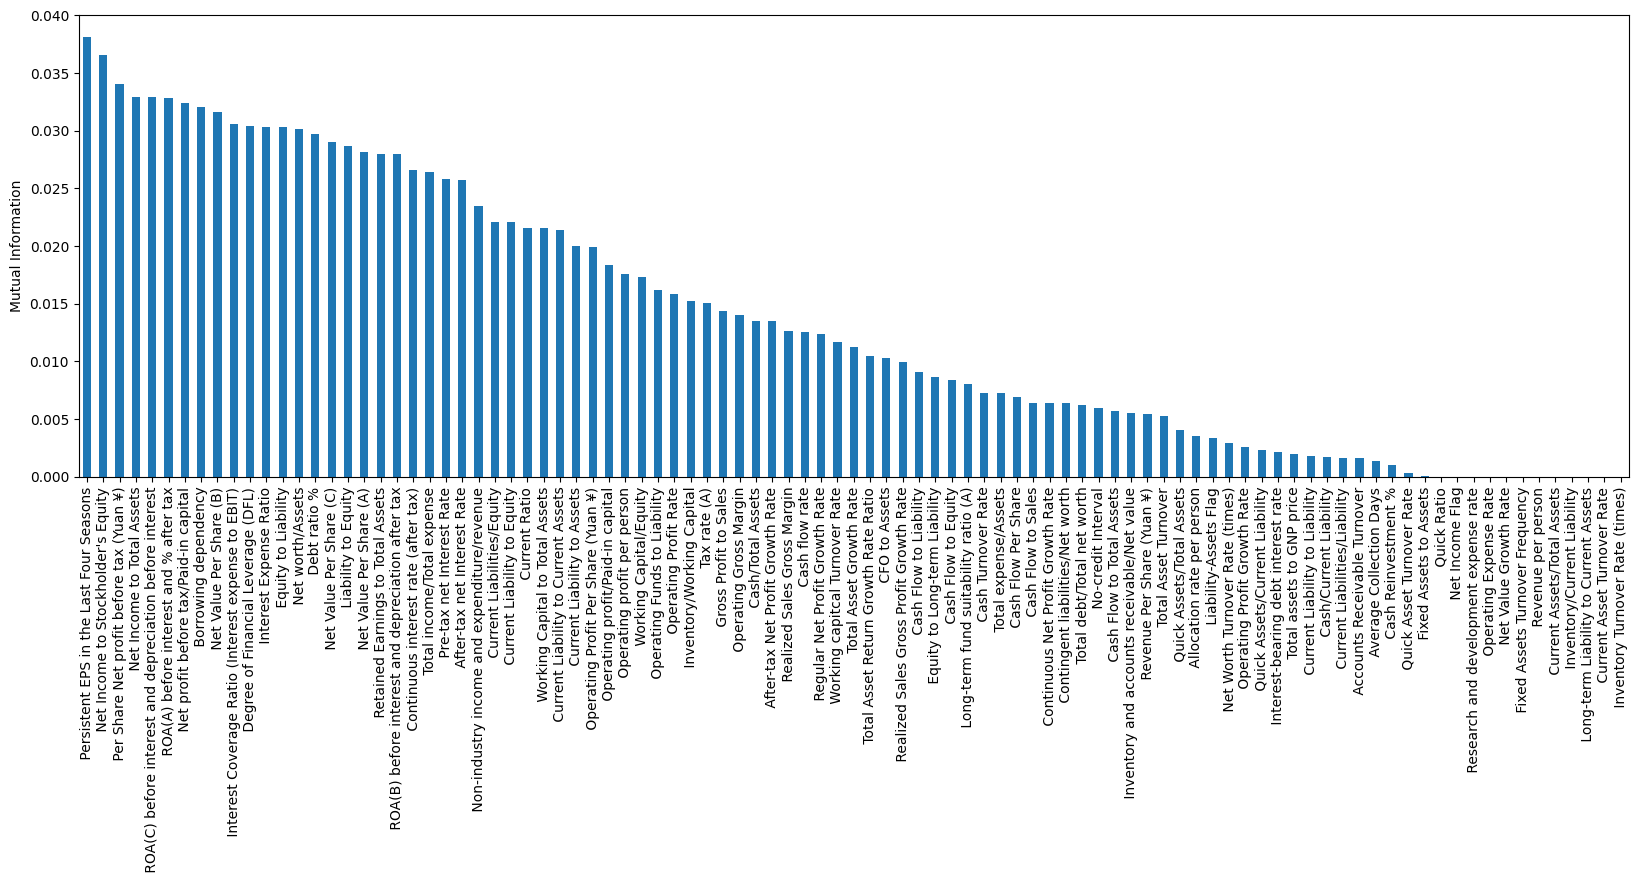

In [115]:
# the less mi value, the less information we can get from
mi = mutual_info_classif(X_train, y_train)
miseries = pd.Series(mi)
miseries
miseries.index = X_train.columns
miseries.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

# Select top k(=10) features

In [116]:
# select features
k_best = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# display features
X_train.columns[k_best.get_support()]

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax', ' Net Value Per Share (B)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity',
       ' Interest Coverage Ratio (Interest expense to EBIT)'],
      dtype='object')

In [117]:
# remove the rest of the features:
X_train = k_best.transform(X_train)
X_test = k_best.transform(X_test)
X_train.shape,X_test.shape

((4773, 10), (2046, 10))

# Feature Scaling

In [118]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [119]:
lgclassifier = LogisticRegression(random_state = 42)
lgclassifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [120]:
y_pred = lgclassifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [121]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.9638318670576735


[[1963    5]
 [  69    9]]


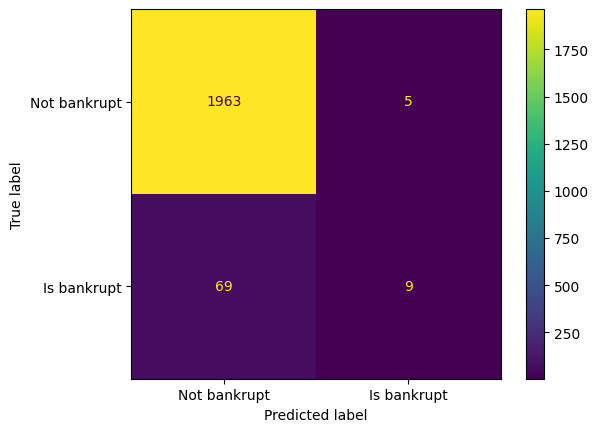

In [122]:
c_matrix = confusion_matrix(y_test,y_pred)
#print confusion matrix
print(c_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,display_labels=["Not bankrupt", "Is bankrupt"])
disp.plot()
plt.show()

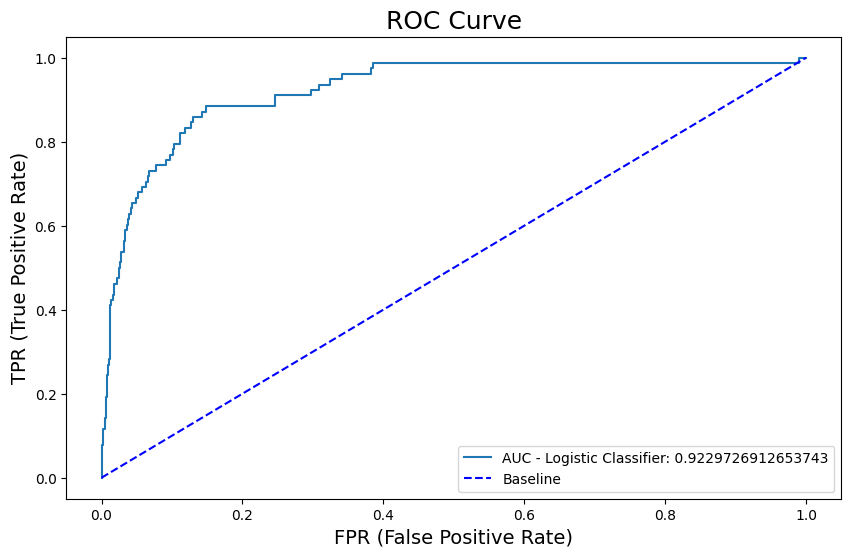

In [123]:
#plots the ROC curves
plt.figure(figsize=(10, 6))
lg_probabilities = lgclassifier.predict_proba(X_test)[:, 1]

lg_auc = roc_auc_score(y_test, lg_probabilities)
lg_fpr, lg_tpr, lg_thresholds = roc_curve(y_test, lg_probabilities)
plt.plot(lg_fpr, lg_tpr, label=f"AUC - Logistic Classifier: {lg_auc}")

plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline') # plot the baseline model, AUC of 0.5

plt.xlabel('FPR (False Positive Rate)', size=14)
plt.ylabel('TPR (True Positive Rate)', size=14)
plt.title('ROC Curve', size=18)
plt.legend()

# Try to rebalance data - Using random under-sampling

In [124]:
class_count_0, class_count_1= df['Bankrupt?'].value_counts()
print("class 0 count: ", class_count_0, "class 1 count:", class_count_1)
# Separate class
class_0 = df[df['Bankrupt?'] == 0]
class_1 = df[df['Bankrupt?'] == 1]

# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
# class count
class_0_under = class_0.sample(class_count_1)


class 0 count:  6599 class 1 count: 220
class 0: (6599, 96)
class 1: (220, 96)


<AxesSubplot: >

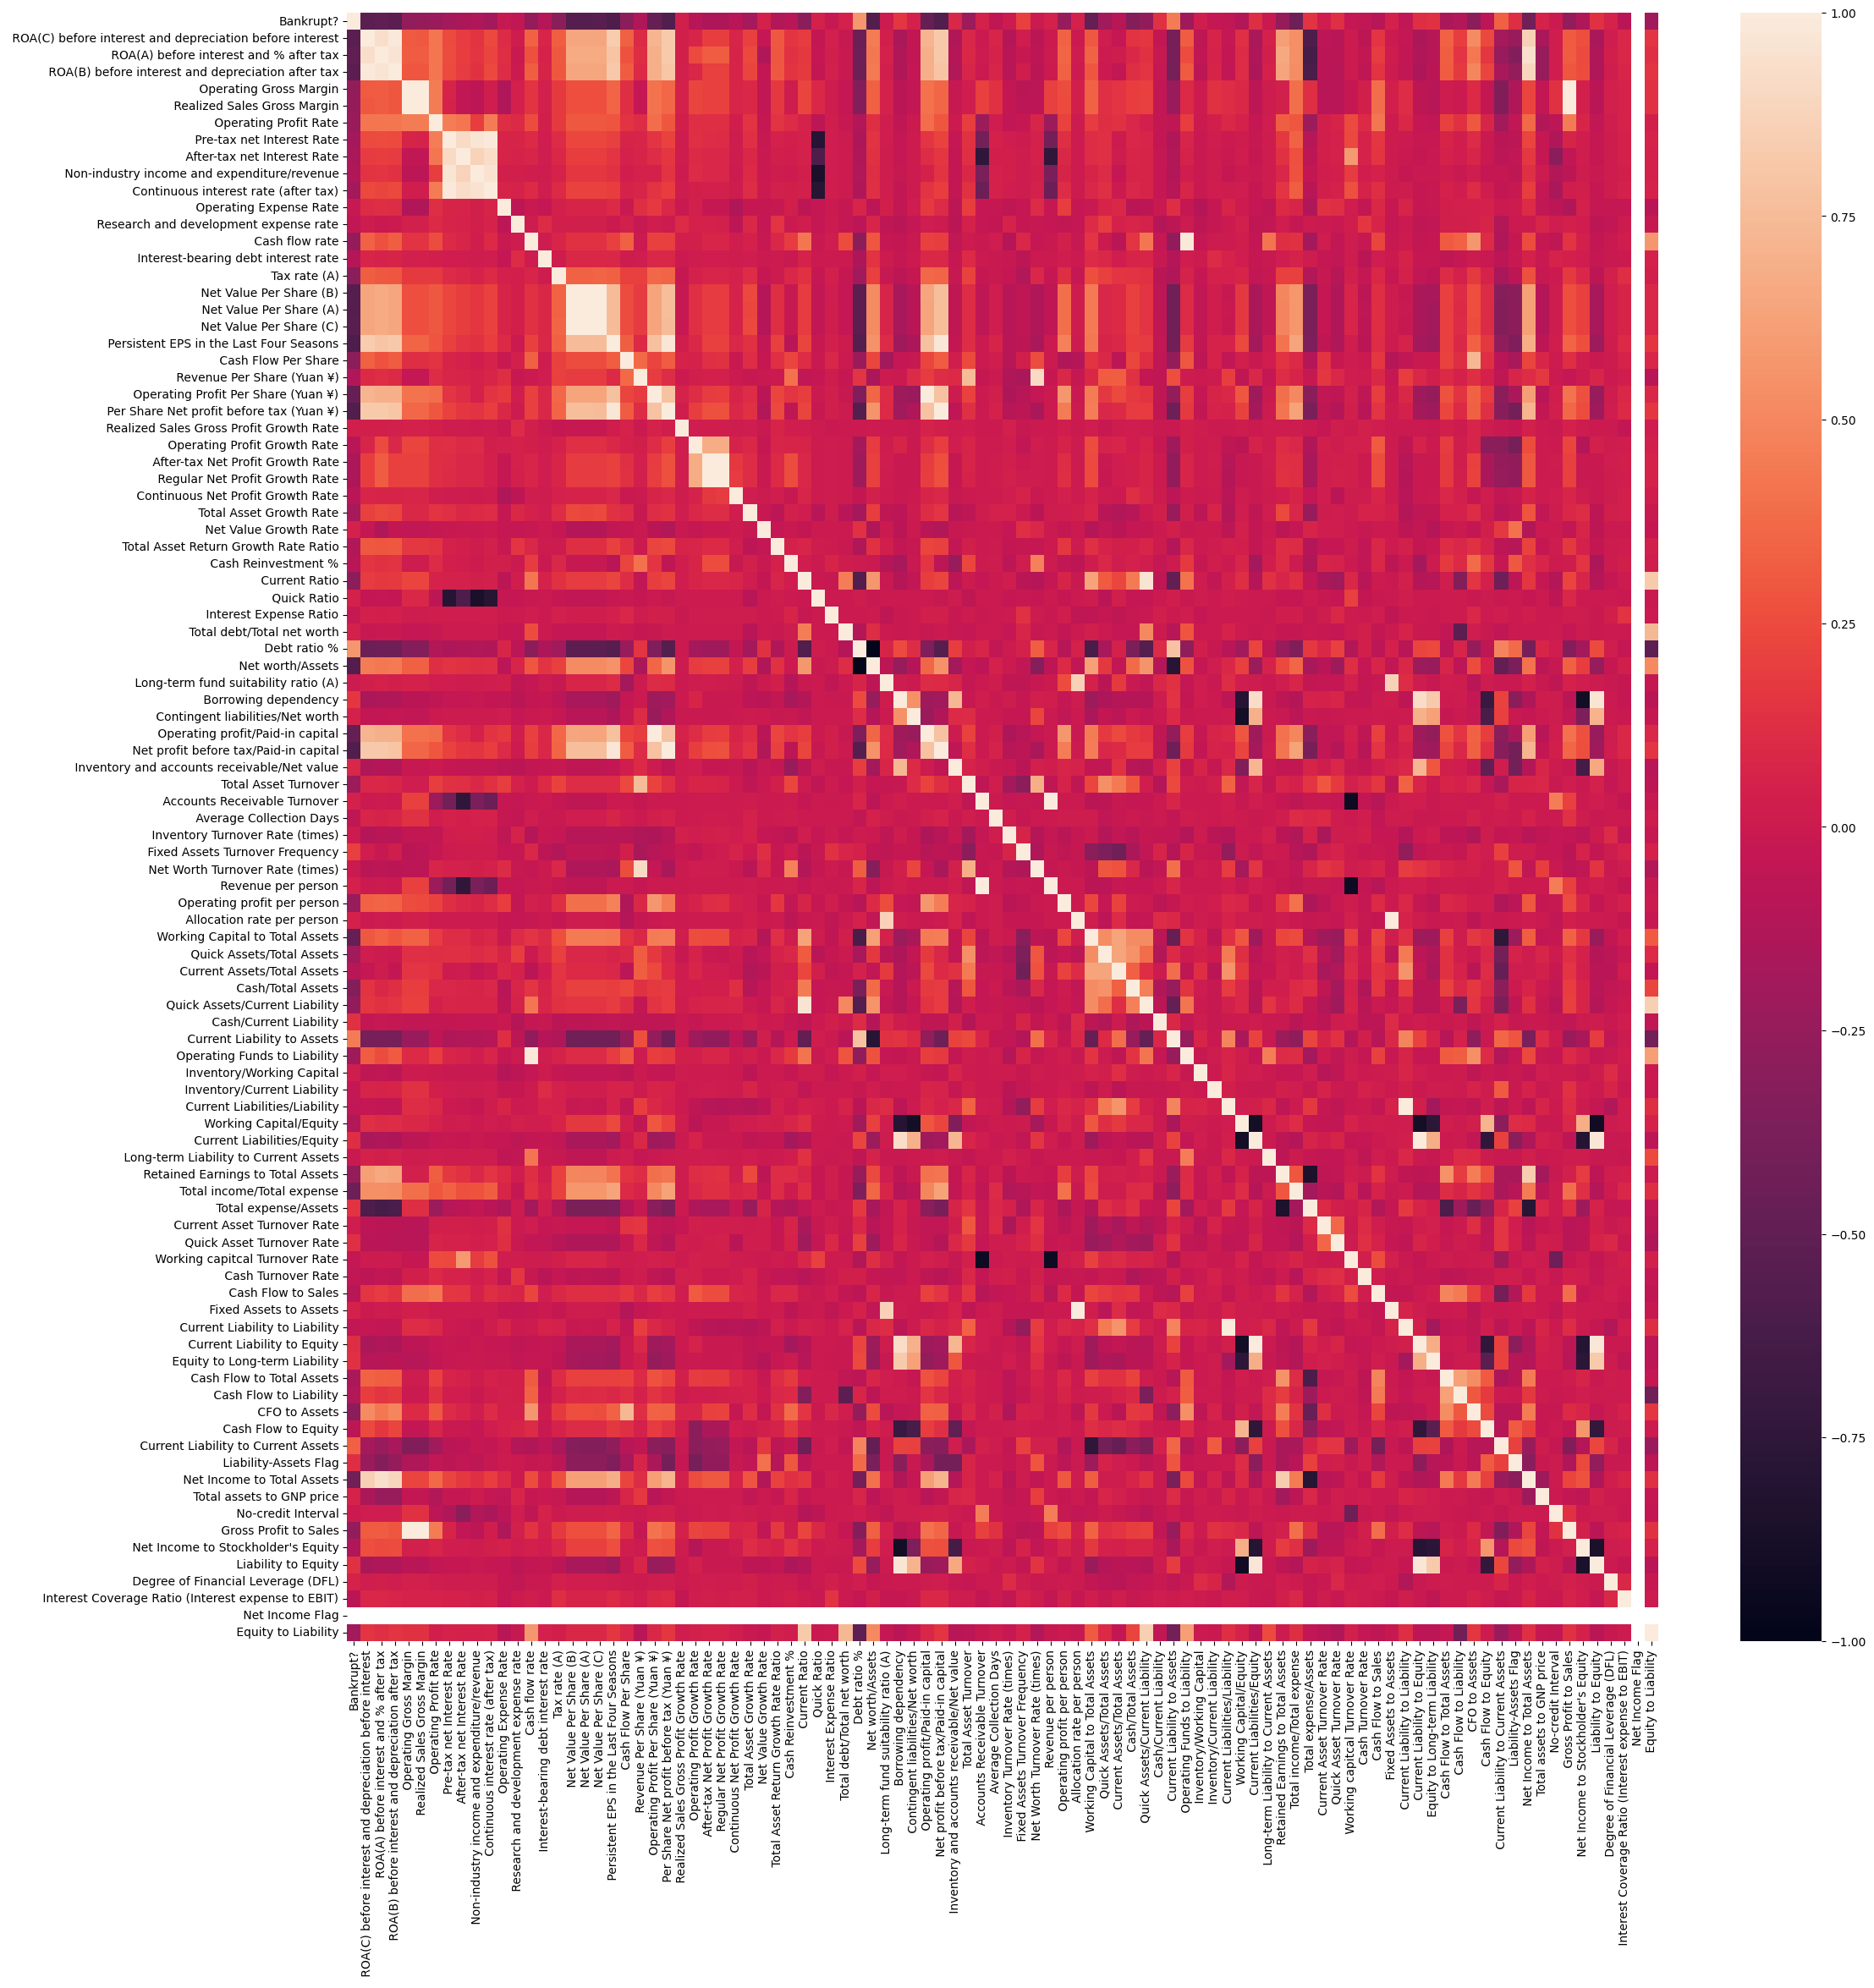

In [125]:
undersampled_df = pd.concat([class_0_under,class_1],axis=0)
plt.figure(figsize=(25,25))
sns.heatmap(undersampled_df.corr())

# Undersampling rebalanced - Model prediction

In [126]:
X_under = undersampled_df.copy()
y_under = undersampled_df['Bankrupt?']
X_under = X_under.drop(['Bankrupt?'], axis=1)

# Undersampling rebalanced - Data Preprocessing : Feature Selection

In [127]:
# Split Data to Train Data and Test Data
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.3, random_state=42)
X_train.shape, X_test.shape

((308, 95), (132, 95))

# Undersampling rebalanced - Analyze Mutual Information

Text(0, 0.5, 'Mutual Information')

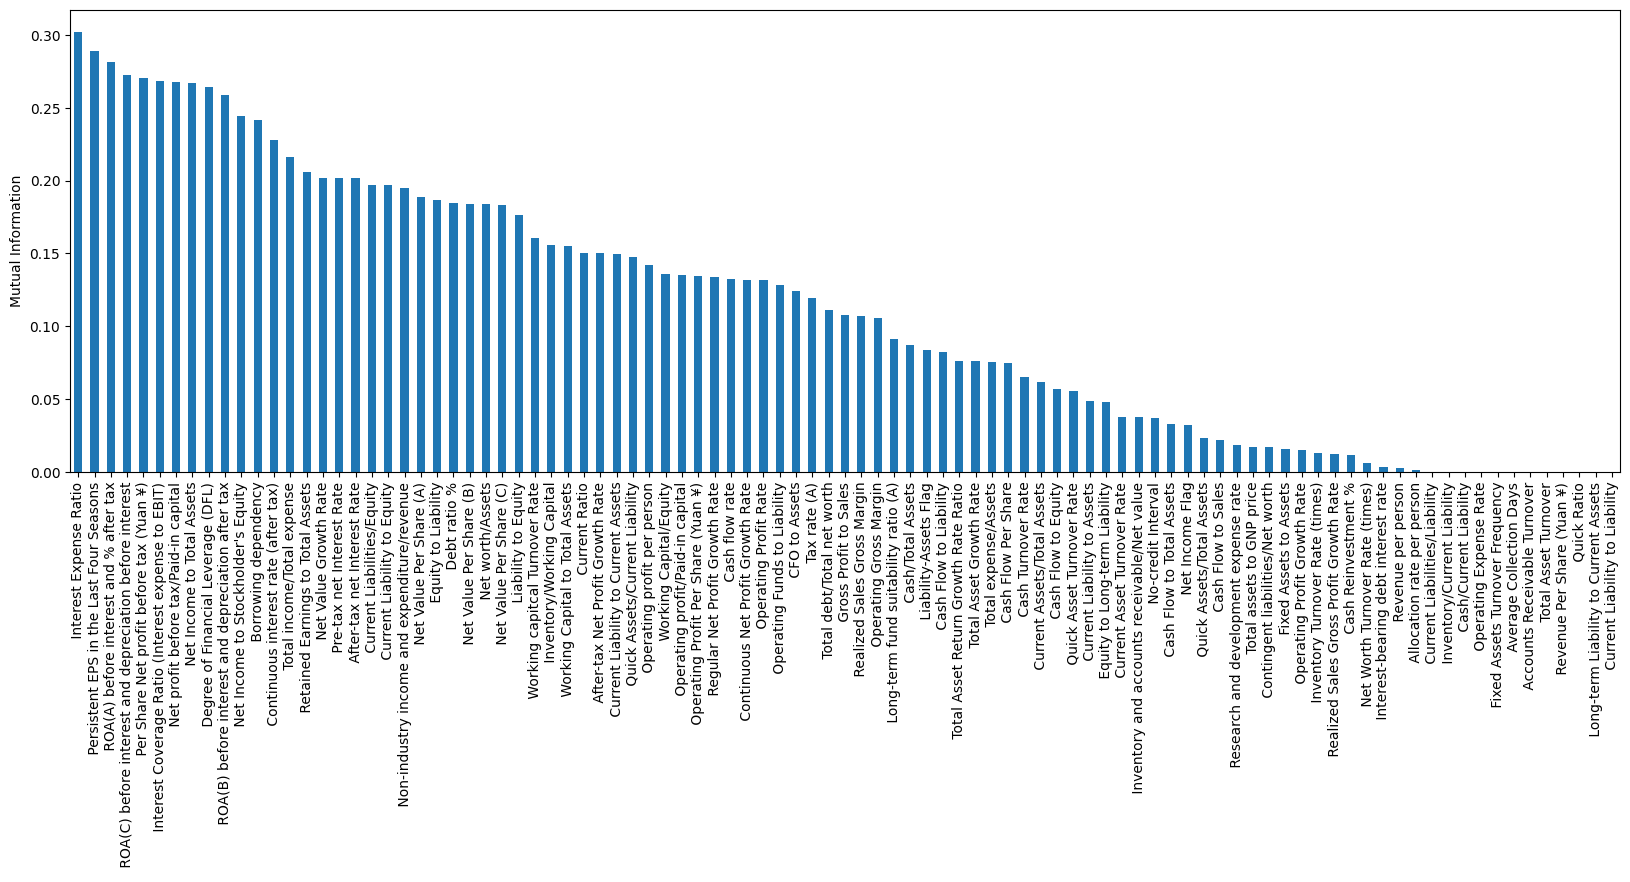

In [128]:
# the less mi value, the less information we can get from
mi = mutual_info_classif(X_train, y_train)
miseries = pd.Series(mi)
miseries
miseries.index = X_train.columns
miseries.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

# Undersampling rebalanced - Select top k(=10) features

In [129]:
# select features
k_best = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# display features
X_train.columns[k_best.get_support()]

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Interest Expense Ratio',
       ' Net profit before tax/Paid-in capital', ' Net Income to Total Assets',
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)'],
      dtype='object')

In [130]:
# remove the rest of the features:
X_train = k_best.transform(X_train)
X_test = k_best.transform(X_test)
X_train.shape,X_test.shape

((308, 10), (132, 10))

# Undersampling rebalanced - Feature Scaling

In [131]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Undersampling rebalanced - Logistic Regression

In [132]:
lgclassifier = LogisticRegression(random_state = 42)
lgclassifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [133]:
y_pred = lgclassifier.predict(X_test)
print(y_pred)

[1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1
 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1]


In [134]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}", "\nthe accuracy rate is lower after rebalancing using under sampling")

Accuracy: 0.8333333333333334 
the accuracy rate is lower after rebalancing using under sampling


[[61 10]
 [12 49]]


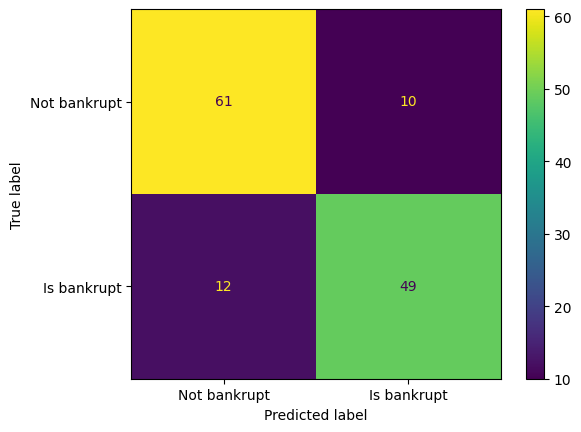

In [135]:
c_matrix = confusion_matrix(y_test,y_pred)
#print confusion matrix
print(c_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,display_labels=["Not bankrupt", "Is bankrupt"])
disp.plot()
plt.show()

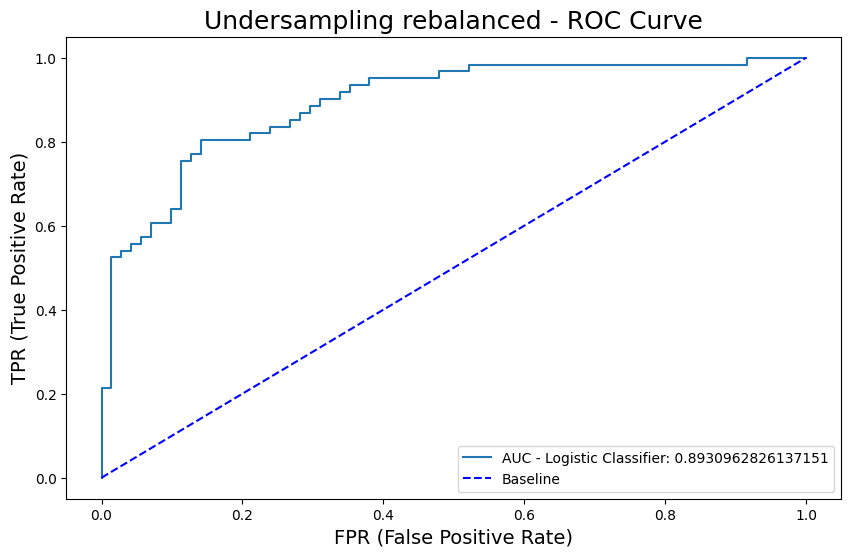

In [136]:
#plots the ROC curves
plt.figure(figsize=(10, 6))
lg_probabilities = lgclassifier.predict_proba(X_test)[:, 1]

lg_auc = roc_auc_score(y_test, lg_probabilities)
lg_fpr, lg_tpr, lg_thresholds = roc_curve(y_test, lg_probabilities)
plt.plot(lg_fpr, lg_tpr, label=f"AUC - Logistic Classifier: {lg_auc}")

plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline') # plot the baseline model, AUC of 0.5

plt.xlabel('FPR (False Positive Rate)', size=14)
plt.ylabel('TPR (True Positive Rate)', size=14)
plt.title('Undersampling rebalanced - ROC Curve', size=18)
plt.legend()

# Undersampling rebalanced - Random Forest

In [137]:
# This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.
# Ref link: https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/#:~:text=n_estimators%20%3A,but%20makes%20your%20code%20slower.

# run random forest and tune the highest n_estimatores
scores =[]
y_values = []
for k in range(1, 100):
    rfc = RandomForestClassifier(n_estimators=k, max_features='sqrt')
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    y_values.append({'y_test': y_test, 'y_pred': y_pred})

max_acc = max(scores)
max_acc_n = scores.index(max_acc) + 1
print(f"Under Sampling for Random Forest - Accuracy Score: {max_acc} with n_estimators: {max_acc_n}")

Under Sampling for Random Forest - Accuracy Score: 0.8484848484848485 with n_estimators: 44


[[62  9]
 [12 49]]


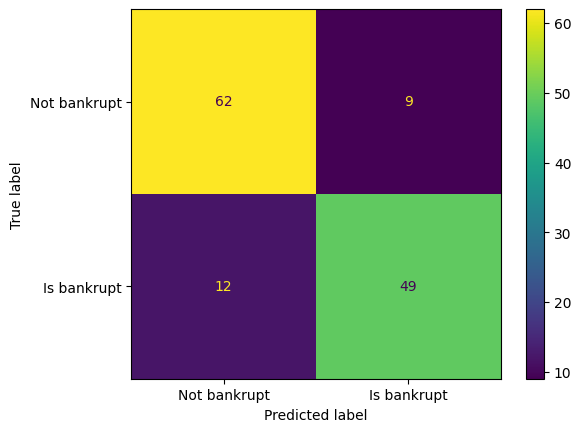

In [138]:
y_pred_best = y_values[max_acc_n]['y_pred']
y_test_best = y_values[max_acc_n]['y_test']
c_matrix = confusion_matrix(y_test_best, y_pred_best)

print(c_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=["Not bankrupt", "Is bankrupt"])
disp.plot()
plt.show()

In [139]:
print(classification_report(y_test_best, y_pred_best))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        71
           1       0.84      0.80      0.82        61

    accuracy                           0.84       132
   macro avg       0.84      0.84      0.84       132
weighted avg       0.84      0.84      0.84       132

